In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp

In [2]:
adata = sc.read('data/iPS/log_normalised_counts.csv')
adata = adata.transpose()

In [3]:
cell_stages = pd.read_csv('data/iPS/cell_diff_stages.tsv', sep = '\t', index_col = 0)
cell_stages = cell_stages.sort_index()
cell_stages = cell_stages.set_index('cell')
cell_stages

,pseudo,day,cell_differentiation
cell,,,
21843_1#10,0.292682,day1,mesendo
21843_1#100,0.484716,day1,mesendo
21843_1#101,0.403809,day1,mesendo
21843_1#102,0.260772,day1,mesendo
21843_1#103,0.355366,day1,mesendo
...,...,...,...
24539_8#93,0.199677,day1,mesendo
24539_8#94,0.251769,day1,mesendo
24539_8#95,0.226935,day1,mesendo


In [4]:
cell_stages.cell_differentiation.unique()

array(['mesendo', 'no_stage', 'defendo', 'ips'], dtype=object)

In [5]:
cell_stages

,pseudo,day,cell_differentiation
cell,,,
21843_1#10,0.292682,day1,mesendo
21843_1#100,0.484716,day1,mesendo
21843_1#101,0.403809,day1,mesendo
21843_1#102,0.260772,day1,mesendo
21843_1#103,0.355366,day1,mesendo
...,...,...,...
24539_8#93,0.199677,day1,mesendo
24539_8#94,0.251769,day1,mesendo
24539_8#95,0.226935,day1,mesendo


In [6]:
adata.obs['cell_differentiation'] = cell_stages['cell_differentiation']
adata.obs['pseudotime'] = cell_stages['pseudo']
adata.obs['day'] = cell_stages['day']

In [7]:
sc.tl.pca(adata, svd_solver='arpack')

/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


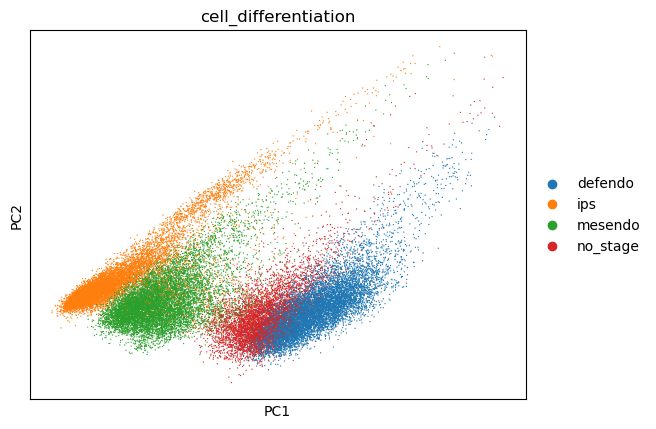

In [8]:
sc.pl.pca(adata, color = 'cell_differentiation')

In [9]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [10]:
sc.tl.umap(adata)

/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


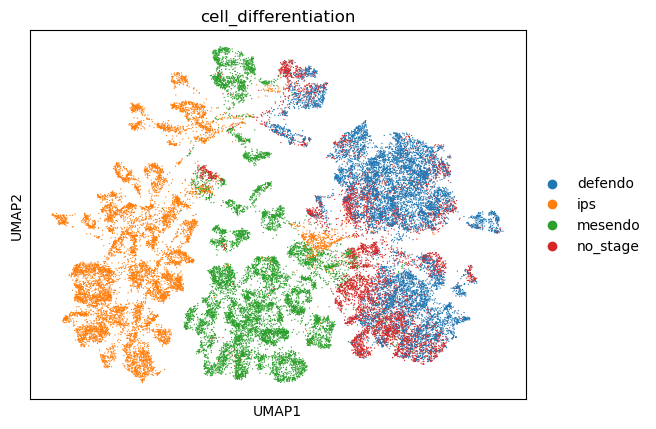

In [11]:
sc.pl.umap(adata, color='cell_differentiation')

In [12]:
adata.obs['cell_differentiation']

21843_1#10     mesendo
21843_1#100    mesendo
21843_1#101    mesendo
21843_1#102    mesendo
21843_1#103    mesendo
                ...   
24539_8#93     mesendo
24539_8#94     mesendo
24539_8#95     mesendo
24539_8#97     mesendo
24539_8#98     mesendo
Name: cell_differentiation, Length: 36044, dtype: category
Categories (4, object): ['defendo', 'ips', 'mesendo', 'no_stage']

In [13]:
adata

AnnData object with n_obs × n_vars = 36044 × 11231
    obs: 'cell_differentiation', 'pseudotime', 'day'
    uns: 'pca', 'cell_differentiation_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [14]:
import nimfa

In [15]:
non_zero_elements = np.count_nonzero(adata.X)

In [17]:
non_zero_elements / adata.X.size

0.7510606996518002

In [ ]:
factors = 10
nmf = nimfa.Nmf(adata.X, seed="nndsvd", rank=10, max_iter=20,
                objective='div')
nmf_fit = nmf()